<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [10]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [11]:
# 1. Display column names
print("Column Names:")
print(df.columns.tolist())

# 2. Display data types
print("\nData Types:")
print(df.dtypes)

# 3. Display general summary info
print("\nDataset Info:")
print(df.info())

# 4. Optional: View summary statistics for numerical columns
print("\nSummary Statistics (Numerical):")
print(df.describe())

# 5. Optional: View summary statistics for categorical columns
print("\nSummary Statistics (Categorical):")
print(df.describe(include='object'))


Column Names:
['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWa

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [12]:
# Drop columns where more than 50% of values are missing
df_cleaned = df.dropna(thresh=len(df) * 0.5, axis=1)

# # Loop through each column and impute based on type
# for col in df.columns:
#     if df[col].dtype in ['float64', 'int64']:
#         df[col].fillna(df[col].mean(), inplace=True)
#     else:
#         df[col].fillna(df[col].mode()[0], inplace=True)

# # Check if missing values are handled
# print("Missing values after imputation:")
# print(df.isnull().sum())


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [13]:
# Loop through columns and print value counts
for col in df.columns:
    print(f"\nValue Counts for '{col}':")
    print(df[col].value_counts(dropna=False))  # include NaNs if any remain


Value Counts for 'ResponseId':
ResponseId
1        1
43631    1
43618    1
43619    1
43620    1
        ..
21818    1
21819    1
21820    1
21821    1
65437    1
Name: count, Length: 65437, dtype: int64

Value Counts for 'MainBranch':
MainBranch
I am a developer by profession                                                           50207
I am not primarily a developer, but I write code sometimes as part of my work/studies     6511
I am learning to code                                                                     3875
I code primarily as a hobby                                                               3334
I used to be a developer by profession, but no longer am                                  1510
Name: count, dtype: int64

Value Counts for 'Age':
Age
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Prefer not to say       32

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


C:\Users\beall\AppData\Local\Temp\ipykernel_10928\2512220027.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['JobSat'].dropna(), shade=True)


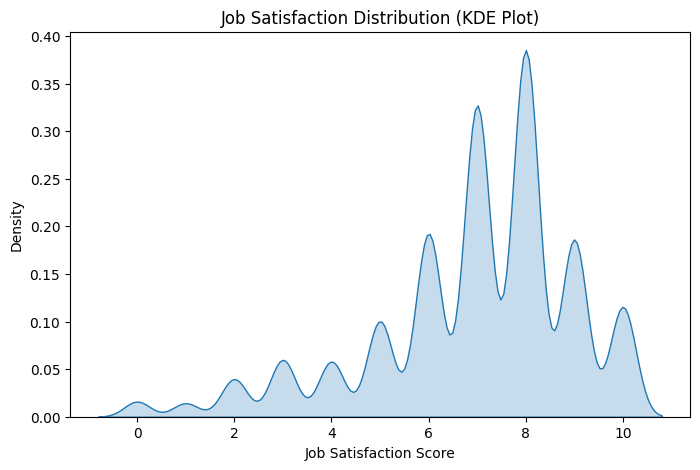

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop missing values for KDE
plt.figure(figsize=(8, 5))
sns.kdeplot(df['JobSat'].dropna(), shade=True)
plt.title("Job Satisfaction Distribution (KDE Plot)")
plt.xlabel("Job Satisfaction Score")
plt.ylabel("Density")
plt.show()


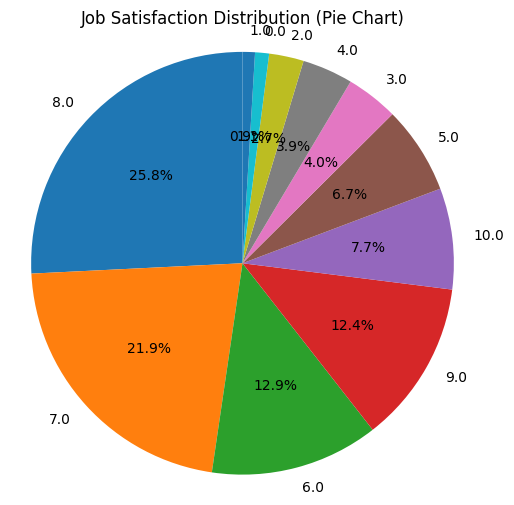

In [15]:
import matplotlib.pyplot as plt

# Count values
job_sat_counts = df['JobSat'].value_counts()

# Plot
plt.figure(figsize=(6, 6))
plt.pie(job_sat_counts, labels=job_sat_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Job Satisfaction Distribution (Pie Chart)")
plt.axis('equal')
plt.show()


### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [16]:
from collections import Counter

# Split and explode each multi-value string
have = df['LanguageHaveWorkedWith'].dropna().str.split(';').explode().str.strip()
want = df['LanguageWantToWorkWith'].dropna().str.split(';').explode().str.strip()

# Count frequencies
have_counts = Counter(have)
want_counts = Counter(want)

# Convert to DataFrame for visualization
lang_df = pd.DataFrame.from_dict({
    'HaveWorkedWith': have_counts,
    'WantToWorkWith': want_counts
}).fillna(0).astype(int)

lang_df = lang_df.sort_values(by='HaveWorkedWith', ascending=False)


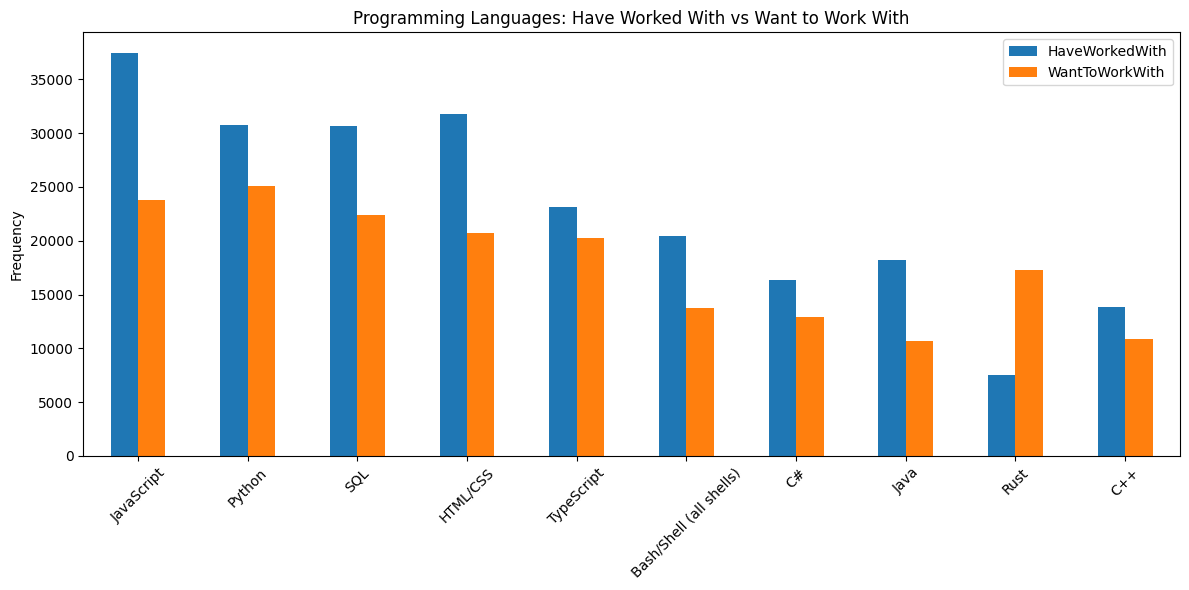

In [17]:
import matplotlib.pyplot as plt

# Select top 10 languages by combined popularity
lang_df['Total'] = lang_df['HaveWorkedWith'] + lang_df['WantToWorkWith']
top_langs = lang_df.sort_values('Total', ascending=False).head(10)

# Plot
top_langs[['HaveWorkedWith', 'WantToWorkWith']].plot(kind='bar', figsize=(12, 6))
plt.title("Programming Languages: Have Worked With vs Want to Work With")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


In [31]:
# Get top 10 countries by frequency
top_countries = df['Country'].value_counts().head(10).index

# Filter dataset
df_top_countries = df[df['Country'].isin(top_countries)]

# Create contingency table
remote_by_country = pd.crosstab(df_top_countries['Country'], df_top_countries['RemoteWork'])


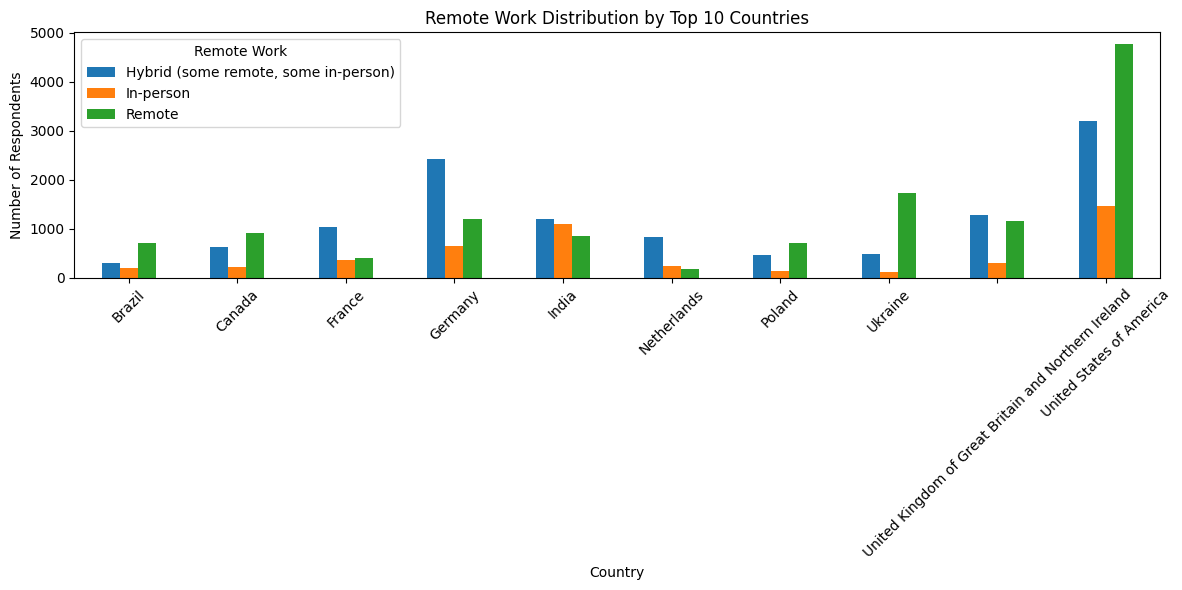

In [32]:
import matplotlib.pyplot as plt

remote_by_country.plot(kind='bar', figsize=(12, 6))
plt.title("Remote Work Distribution by Top 10 Countries")
plt.xlabel("Country")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.legend(title='Remote Work')
plt.tight_layout()
plt.show()


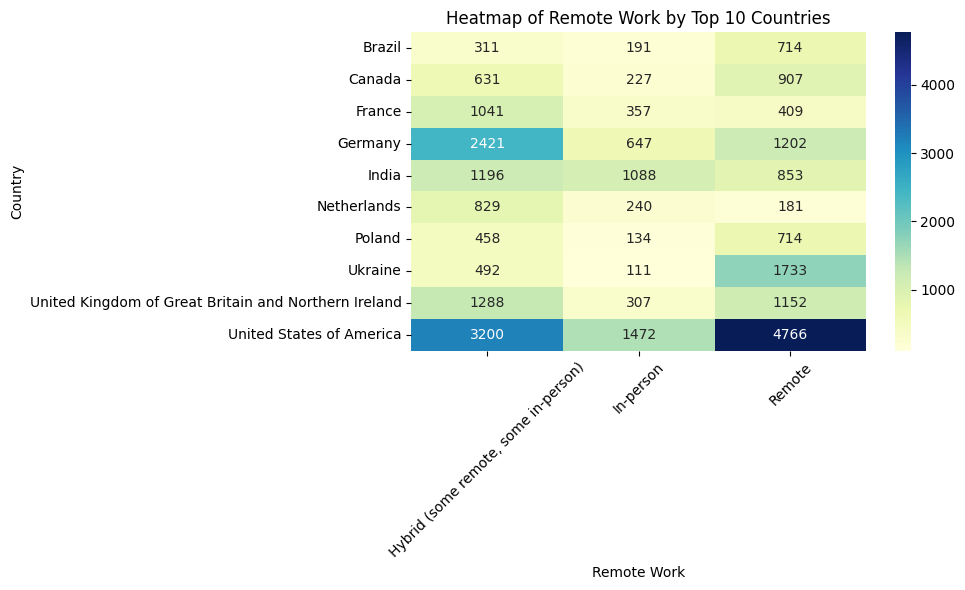

In [34]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(remote_by_country, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Heatmap of Remote Work by Top 10 Countries")
plt.xlabel("Remote Work")
plt.xticks(rotation=45)
plt.ylabel("Country")
plt.tight_layout()
plt.show()


### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [39]:
def convert_years(val):
    if val == 'Less than 1 year':
        return 0.5
    elif val == 'More than 50 years':
        return 51
    try:
        return float(val)
    except:
        return None

df['YearsCodePro_Clean'] = df['YearsCodePro'].dropna().apply(convert_years)


In [40]:
from sklearn.preprocessing import LabelEncoder

job_sat_encoder = LabelEncoder()
df['JobSat_Clean'] = job_sat_encoder.fit_transform(df['JobSat'].astype(str))


In [41]:
pearson_corr = df[['JobSat_Clean', 'YearsCodePro_Clean']].dropna().corr(method='pearson')
print("📈 Pearson Correlation:\n", pearson_corr)


📈 Pearson Correlation:
                     JobSat_Clean  YearsCodePro_Clean
JobSat_Clean            1.000000            0.005176
YearsCodePro_Clean      0.005176            1.000000


In [42]:
spearman_corr = df[['JobSat_Clean', 'YearsCodePro_Clean']].dropna().corr(method='spearman')
print("📊 Spearman Correlation:\n", spearman_corr)


📊 Spearman Correlation:
                     JobSat_Clean  YearsCodePro_Clean
JobSat_Clean            1.000000           -0.039466
YearsCodePro_Clean     -0.039466            1.000000


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


In [44]:
# Cross-tab: rows = Education Level, columns = Employment Status
employment_edu_ct = pd.crosstab(df['EdLevel'], df['Employment'])
print(employment_edu_ct.head())


Employment                                       Employed, full-time  \
EdLevel                                                                
Associate degree (A.A., A.S., etc.)                             1059   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                   16806   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                11011   
Primary/elementary school                                        160   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                  2073   

Employment                                       Employed, full-time;Employed, part-time  \
EdLevel                                                                                    
Associate degree (A.A., A.S., etc.)                                                    9   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          90   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       61   
Primary/elementary school          

C:\Users\beall\AppData\Local\Temp\ipykernel_10928\2307318880.py:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


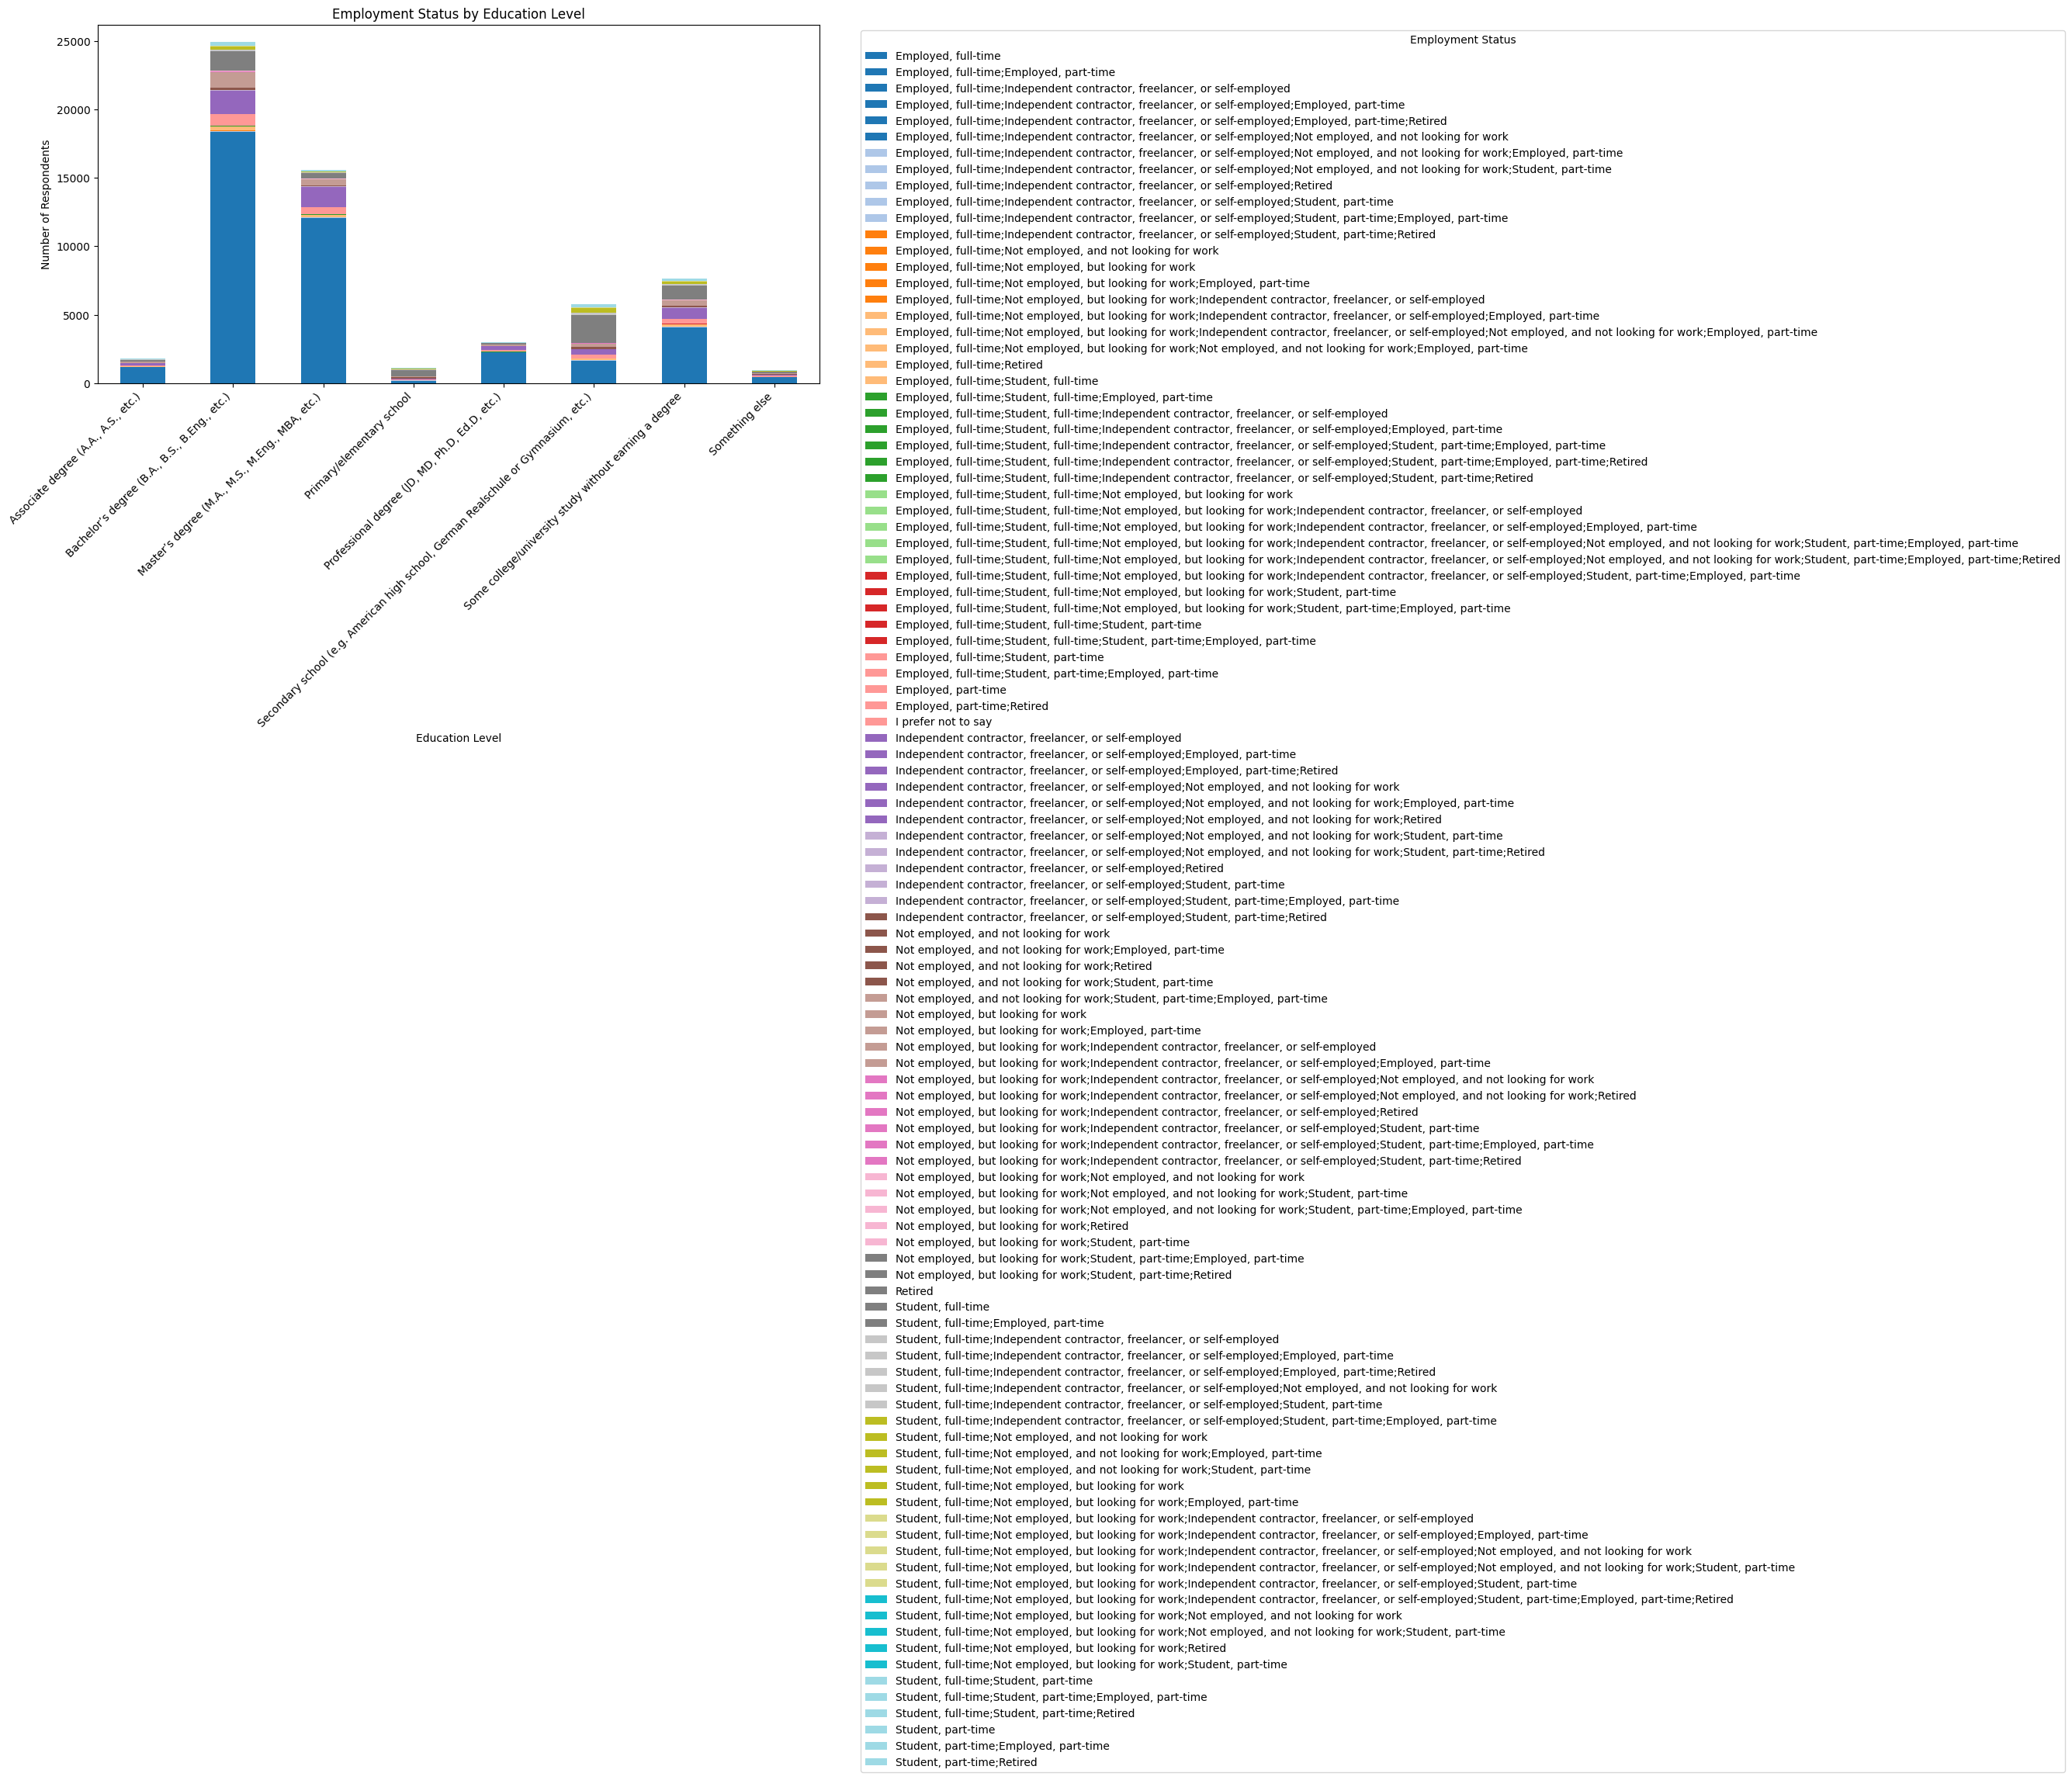

In [45]:
import matplotlib.pyplot as plt

# Plot
employment_edu_ct.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title("Employment Status by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [46]:
# Save to a new CSV file
df.to_csv("cleaned_dataset.csv", index=False)


### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
